In [1]:
from astropy import constants as const
from astropy import units as u
import math 
import numpy as np
import matplotlib.pyplot as plt
#Function with the calculation
def mag_per_arcsec2 (dist_mod, apparent_mag, half_light_radius):
    if(half_light_radius > 0):
        mag_per_arcsec_squared = math.pi * math.pow(100, dist_mod / 5) 
        mag_per_arcsec_squared *= 2.3815 * math.pow(10, -11)
        mag_per_arcsec_squared *= apparent_mag / (half_light_radius ** 2)
        return mag_per_arcsec_squared 
    else:
        return 0

In [87]:
'''
CONSTRUCTING THE DICTIONARIES OF APPARENT VISUAL MAGNITUDE,
DISTANCE MODULUS, AND HALF-LIGHT-RADIUS

Make sure the same objects have the same name and key across
different dictionaries!

References:

Visual apparent magnitude and distance moduli-
https://docs.google.com/spreadsheets/d/1mp8zhq0LpdXtECbgWewob
NH5CtZgpvAEkSuWzP8W3bI/edit?usp=sharing

Note that Cassiopeia III and And XXXII are the same object
and And VII is Cassiopeia? And VI is Peg dSph. And XXXI is Lacerta I.

m_dict will store values for the apparent visual magnitude
dmod_dict will store values for the distance modulus 

Original paper: https://doi.org/10.1093/mnras/stab1754


Half-light radii- 
https://docs.google.com/spreadsheets/d/1hfjPH7jenn2HyDCquqJ0f1EIZU
Bh0ZgvhBG_eL6q4ys/edit?usp=sharing


Original Paper: doi.org/10.1088/0004-637X/743/2/179
'''
dmod_error_message = ("Unmatching number of keys and values for" + 
    "distance modulus dictionary")
m_error_message = ("Unmatching number of keys and values for apparent" +
    "visual magnitude dictionary")
rad_error_message = ("Unmatching number of keys and values for half-" +
    "light-radius dictionary")
    
m_dict = {} #This dictionary will store the apparent visual magnitudes
m_dict_keys = list(("M 32", "NGC 205", "And I", "And XVII", "And III", 
    "And V", "And XX", "And XXXII", "NGC 147 (DDO 3)", "And XXX", 
    "And XIV", "And XV", "And II", "NGC 185", "And XXIX ", "And VII", 
    "IC 10", "And XXXI", "LGS 3 (Pisces) ", "And VI", "And XVI"))
m_dict_values = list((8.13, 8.10, 13.16, 16.51, 14.87, 15.14, 17.95, 
    12.15, 9.50, 16.17, 16.00, 15.98, 12.47, 9.20, 16.02, 11.21, 9.50, 
    12.70, 14.30, 12.97, 16.09))
if(len(m_dict_keys) == len(m_dict_values) == 21):
    for index in range(len(m_dict_keys)):
        m_dict[m_dict_keys[index]] = m_dict_values[index]
    print("m_dict = ", m_dict, "\n")
    if not(len(list(m_dict.keys())) == len(list(m_dict.values()))
           == 21): print(rad_error_message)
else:
    print(m_error_message)
    
#now to create the distance modulus dictionary the same way
dmod_dict = {} #This dictionary will store the distance moduli
dmod_dict_keys = m_dict_keys
dmod_dict_values = list((24.53, 24.58, 24.36, 24.31, 24.37, 24.44, 
    24.35,24.45, 24.15, 24.17, 24.50, 23.98, 24.07, 23.95, 24.32, 
    24.41, 24.50, 24.40, 24.43, 24.47, 23.39))
if(len(dmod_dict_keys) == len(dmod_dict_values) == 21):
    for index in range(len(dmod_dict_keys)):
        dmod_dict[dmod_dict_keys[index]] = dmod_dict_values[index]
    print("dmod_dict = ", dmod_dict, "\n")
    if not(len(list(dmod_dict.keys())) == len(list(dmod_dict.values()))
           == 21): print(dmod_error_message)
else:
    print(dmod_error_message)
    
#We will carry out a similar process for the half_light radii 
#but now with different keys
rad_dict = {} #This dictionary stores the half-light-radii in parsecs
rad_dict_keys = list(("And I", "And II", "And III", "And V", "And VI", 
    "And VII", "And IX", "And X", "And XI", "And XII", "And XIII", 
    "And XIV", "And XV", "And XVI", "And XVII", "And XVIII", "And XIX", 
    "And XX", "And XXI", "And XXII", "And XXIII", "And XXIV", 
    "And XXV", "And XXVI", "And XXVII"))
rad_dict_values = list((638, 1126, 403, 336, 454, 739, 552, 235, 145, 
    289, 203, 406, 270, 136, 265, 317, 1647, 160, 777, 405, 1316, 349, 
    661, 222, 361))
if(len(rad_dict_keys) == len(rad_dict_values) == 25):
    for index in range(len(rad_dict_keys)):
        rad_dict[rad_dict_keys[index]] = rad_dict_values[index]
    print("rad_dict = ", rad_dict, "\n")
    if not (len(list(rad_dict.keys())) == len(list(rad_dict.values()))
           == 25): print(rad_error_message)
else:
    print(rad_error_message)

m_dict =  {'M 32': 8.13, 'NGC 205': 8.1, 'And I': 13.16, 'And XVII': 16.51, 'And III': 14.87, 'And V': 15.14, 'And XX': 17.95, 'And XXXII': 12.15, 'NGC 147 (DDO 3)': 9.5, 'And XXX': 16.17, 'And XIV': 16.0, 'And XV': 15.98, 'And II': 12.47, 'NGC 185': 9.2, 'And XXIX ': 16.02, 'And VII': 11.21, 'IC 10': 9.5, 'And XXXI': 12.7, 'LGS 3 (Pisces) ': 14.3, 'And VI': 12.97, 'And XVI': 16.09} 

dmod_dict =  {'M 32': 24.53, 'NGC 205': 24.58, 'And I': 24.36, 'And XVII': 24.31, 'And III': 24.37, 'And V': 24.44, 'And XX': 24.35, 'And XXXII': 24.45, 'NGC 147 (DDO 3)': 24.15, 'And XXX': 24.17, 'And XIV': 24.5, 'And XV': 23.98, 'And II': 24.07, 'NGC 185': 23.95, 'And XXIX ': 24.32, 'And VII': 24.41, 'IC 10': 24.5, 'And XXXI': 24.4, 'LGS 3 (Pisces) ': 24.43, 'And VI': 24.47, 'And XVI': 23.39} 

rad_dict =  {'And I': 638, 'And II': 1126, 'And III': 403, 'And V': 336, 'And VI': 454, 'And VII': 739, 'And IX': 552, 'And X': 235, 'And XI': 145, 'And XII': 289, 'And XIII': 203, 'And XIV': 406, 'And XV': 270, 

In [101]:
'''
Go through the keys in rad_dict and see if there's a corresponding key
in the other two arrays. Then calculate the mag/arcsec^2 and the SNR if
there's a corresponding key.
'''
surf_bright = {}
for key in list(rad_dict.keys()):
    try: 
        m, dmod, radius = m_dict[key], dmod_dict[key], rad_dict[key]
        surf_bright[key] = mag_per_arcsec2 (dist_mod = dmod, 
                apparent_mag = m, half_light_radius = radius)
    except:
        print(key, "does not have corresponding measurements")
        #print("\n")
print("\n surface brightness dictionary: ", surf_bright)

And IX does not have corresponding measurements
And X does not have corresponding measurements
And XI does not have corresponding measurements
And XII does not have corresponding measurements
And XIII does not have corresponding measurements
And XVIII does not have corresponding measurements
And XIX does not have corresponding measurements
And XXI does not have corresponding measurements
And XXII does not have corresponding measurements
And XXIII does not have corresponding measurements
And XXIV does not have corresponding measurements
And XXV does not have corresponding measurements
And XXVI does not have corresponding measurements
And XXVII does not have corresponding measurements

 surface brightness dictionary:  {'And I': 1.3415751041042741e-05, 'And II': 3.124569081553653e-06, 'And III': 3.834434599347919e-05, 'And V': 5.990289049687165e-05, 'And VI': 2.8895401205225126e-05, 'And VII': 8.91902116156028e-06, 'And XIV': 4.582140209010922e-05, 'And XV': 6.409877137833185e-05, 'And XV

Text(0.5, 1.0, 'Surface Brightness of M31 Satellites')

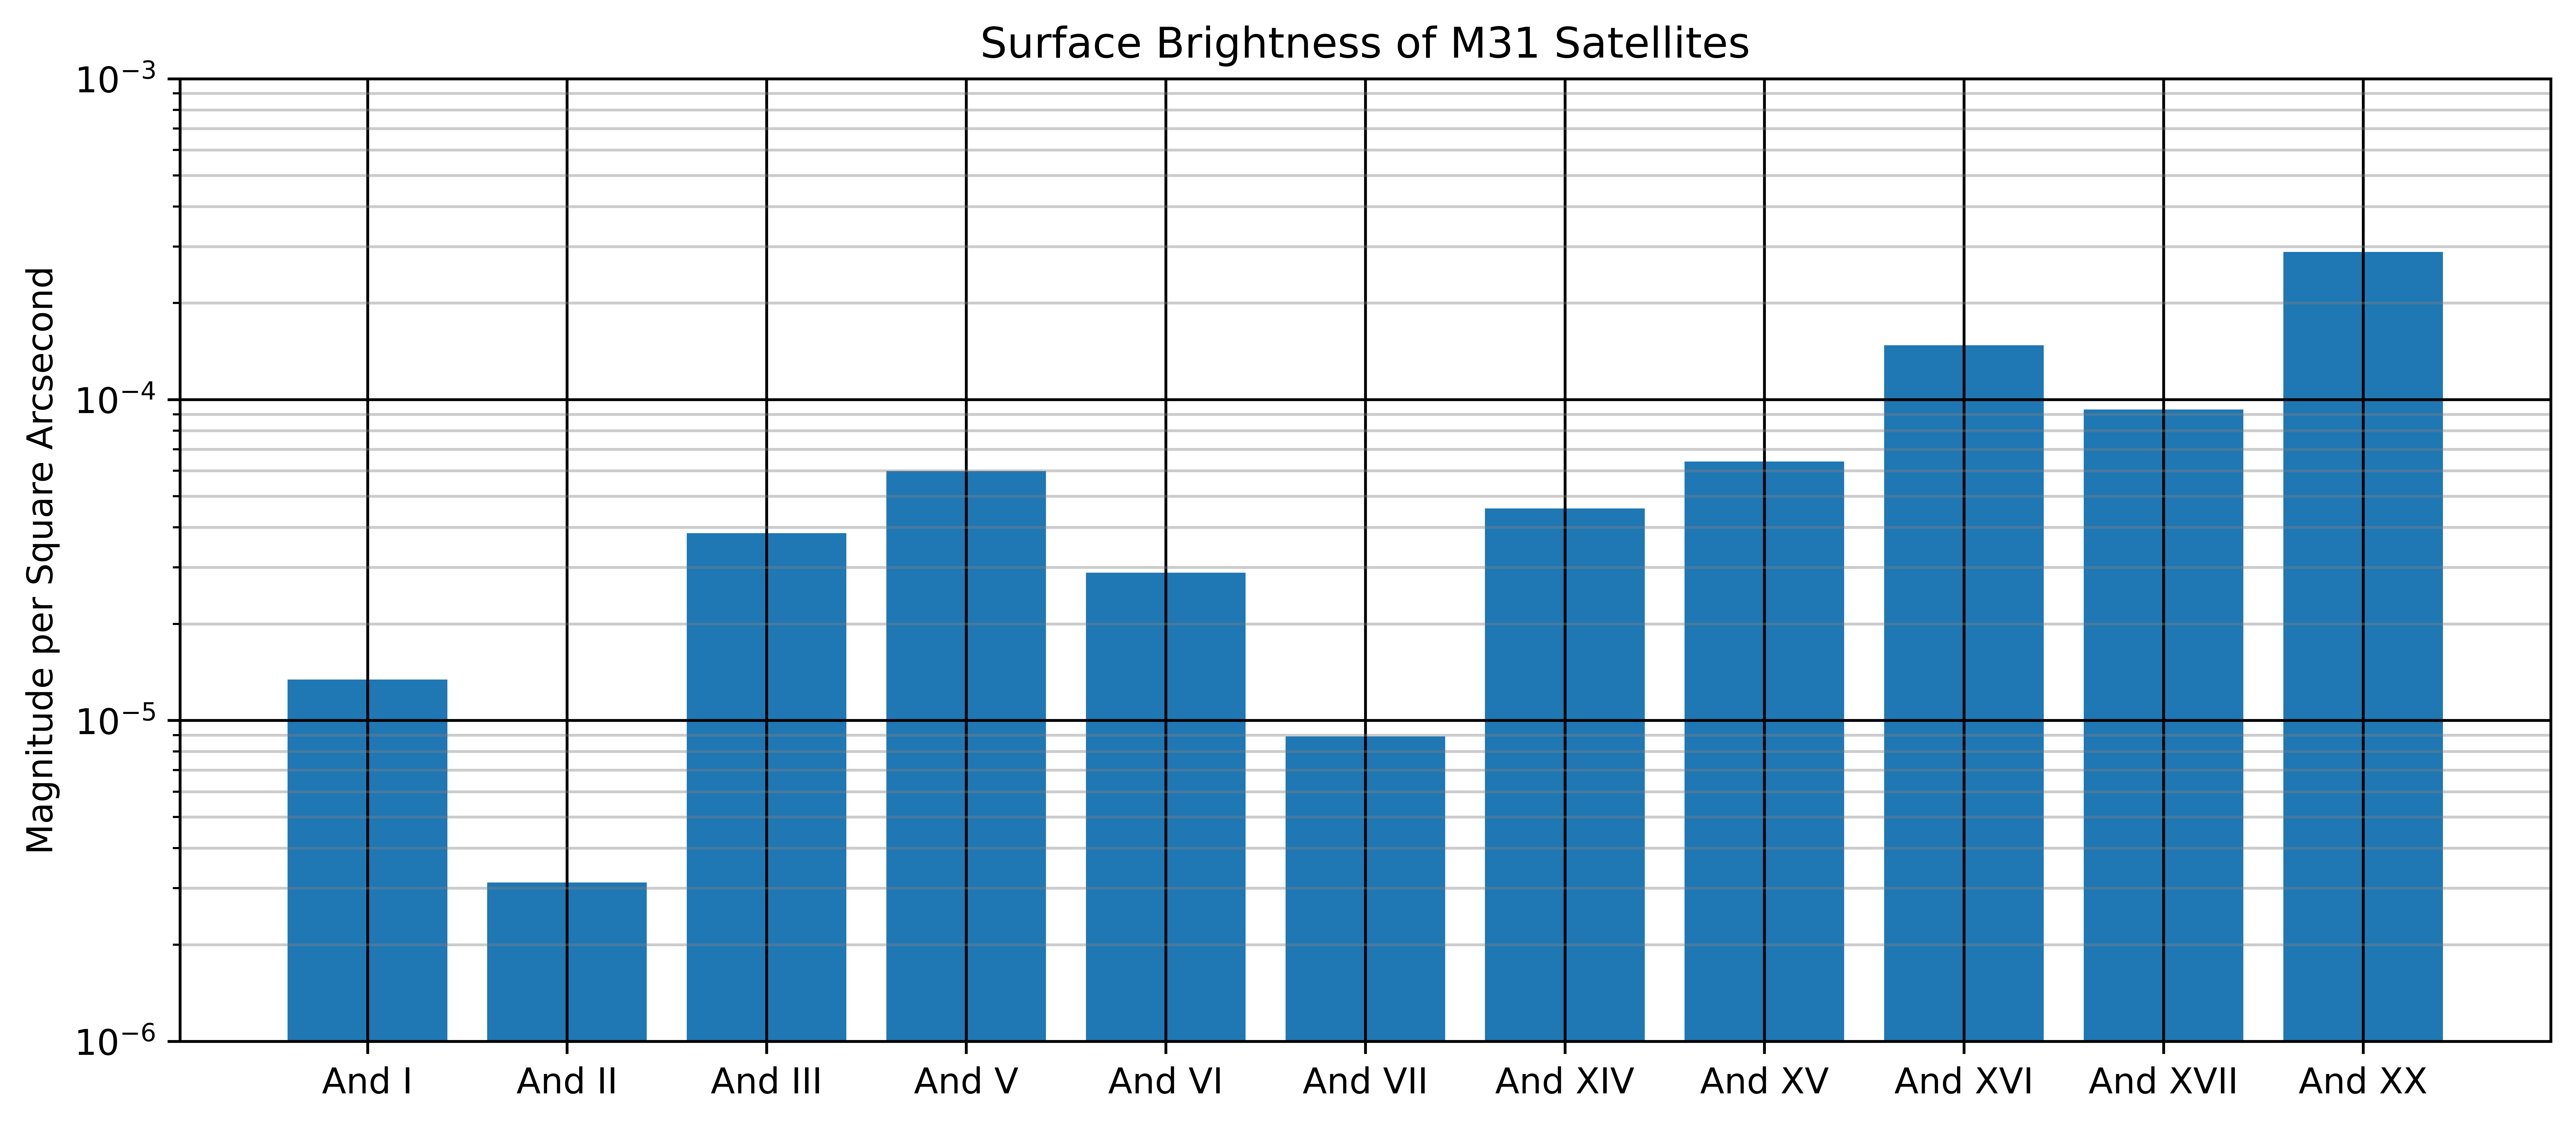

In [106]:
labels = np.array(list((surf_bright.keys())))
values = np.array(list((surf_bright.values())))
fig, ax = plt.subplots(figsize=(12, 5))
indices = np.arange(len(labels))
fig.dpi = 1000
bottom = int(np.amin(values))
plt.bar(x = indices, height = values - bottom, 
        bottom = bottom )
plt.xticks(indices, labels)
plt.grid(which='major', color='black')
plt.grid(which='minor', color='grey', alpha=0.4)
plt.minorticks_on()
plt.ylabel("Magnitude per Square Arcsecond")
plt.tick_params(axis='x', which='minor', bottom = False)
plt.grid(axis='x', which = 'minor', alpha = 0)
plt.yscale('log')
log_values = np.log10(values)
plt.ylim(math.pow(10, int(np.amin(log_values) - 1)), 
         math.pow(10, int(np.amax(log_values))) )
plt.yticks()
plt.title("Surface Brightness of M31 Satellites")

In [7]:
'''
References: 
https://web.archive.org/web/20180721162252/https://www.
cfa.harvard.edu/~dfabricant/huchra/ay145/mags.html

https://en.wikipedia.org/wiki/Apparent_magnitude#cite_note-UTmags-19

https://het.as.utexas.edu/HET/Software/Astropy-0.4.2/api/astropy.units.
quantity.Quantity.html

https://sites.astro.caltech.edu/palomar/observer/200inchResources/
tspecspecs.html
'''

def convert_mag_to_flux(mag, band, gain, fov, object_size): 
    if(band == 'J' or band == 'J'):
        lam = (1.220 * u.micron).to("m") #wavelength of each photon
        ref_val = 1570 * u.jansky
        #based on flux at magnitude 0 in Jy = 10^-26 W m^-2 Hz^-1
        h = const.h.to('J*s')
        c = const.c.to("m/s")
        single_photon_energy = (h * c / lam)
        #since triple spec goes from 1 micron to 2.4 micron
        lower_lam = (1 * u.micron).to("m")
        upper_lam = (2.4 * u.micron).to("m")
        frequency_range = (c / lower_lam) - (c / upper_lam)
        #calculating spectral range in Hz
        flux = math.pow(100, (-mag / 5)) * ref_val * frequency_range
        flux /= single_photon_energy
        flux = flux.si
        #number of photons per square meter per second
        flux *= gain * fov / object_size 
        #total electrons per second in the detector
        return flux.value
    else:
        print("Band not yet computable")
        return 
    
#now to test that it works
Rsky = 19.2 #magnitudes
Rsky = convert_mag_to_flux(mag = Rsky, band = "J", gain = 3.8, 
            fov = 30, object_size = ((3600*360/(2*np.pi))**2))
#here fov refers to the ratio of the slit (1"x30") taken up by the object
print(Rsky)
Robject = convert_mag_to_flux(mag = apparent[15], band = "J", gain = 3.8, 
            fov = 30, object_size = object_size[9])
print(Robject)
#ranking top 3 galaxies ,3 is enough for SNR. 1 is enough if that's all we get. 
#get enough data on 1 galaxy before doing the others

9.440061694712278e-07
308.17857109604404


In [108]:
size_dict = {} #Store the angular sizes in square arcseconds
for object in labels:
    r = np.power(10, dmod_dict[object] / 5) * math.sqrt(10)
    size_dict[object] = math.pi * ((rad_dict[object] / r) ** 2) 
    #now to convert from steradians to square arcseconds
    size_dict[object] *= (3600 * 360 / (2 * math.pi)) ** 2
print("Angular sizes of objects in square arcseconds: ", size_dict)

Angular sizes of objects in square arcseconds:  {'And I': 980937.8593788465, 'And II': 3990955.8192643444, 'And III': 387802.166808342, 'And V': 252742.74257985377, 'And VI': 448860.9711490921, 'And VII': 1256866.1091727845, 'And XIV': 349182.2878866835, 'And XV': 249303.09341127152, 'And XVI': 108912.55736484402, 'And XVII': 177211.49398483054, 'And XX': 62264.442567348}


In [8]:
def calc_SNR (Robject, t, Rsky, n, RN, dark, magnitudes, band, fov, gain, 
              object_size):
    if(magnitudes):
        Rsky = convert_mag_to_flux(Rsky, "J", gain = gain, 
            fov = 30, object_size = ((3600*360/(2*np.pi))**2) )
        
        Robject = convert_mag_to_flux(Robject, "J", gain = gain, 
            fov = 30, object_size = object_size)
        #converts to number of photons per square meter per second
    SNR = Robject * t / math.sqrt((Robject * t) + (Rsky * t * n) + 
        ((RN ** 2) * n) + (dark * t * n)) 
    return SNR

#now to just to make sure it will compile
calc_SNR(Robject = 1, t=1, Rsky =1, n=1, RN=1, 
         dark=1, magnitudes = True, band = "J", fov = 30, gain = 1,
        object_size = 1)

448766.8320903948

In [121]:
'''
Now we will use all of the relevant constants for the TSPEC at Palomar
'''
max_t = 7200
int_time_array = np.arange(1, max_t) #integration time in seconds
RN = 10 #electrons
dark = .085 #electrons
Rsky = 19.2 #magnitudes
n = 1024 * 2048 #square pixels
gain = 3.8 #electrons per pixel
snr_array = [0] * len(usable_values)
snr_dict = {}
for object in labels:
    #snr_array[index] = np.empty(len(int_time_array))
    #for t in range(len(int_time_array)):
    snr_dict[object] =  calc_SNR(Robject = m_dict[object], 
        t = max_t,  Rsky = Rsky, n = n, RN = RN, 
        dark = dark, magnitudes = True, band = "J", fov = 30, 
        gain = gain, object_size = size_dict[object])

In [122]:
snr_dict

{'And VII': 9.348867818562463,
 'And VI': 5.175587344452655,
 'And I': 1.9881442996716112,
 'And V': 1.2457040520588971,
 'And XVI': 1.2050799019919312,
 'And III': 1.0410809255662608,
 'And II': 0.9226106563730319,
 'And XV': 0.582598859230409,
 'And XVII': 0.5030438656921166,
 'And XIV': 0.4083627033739609,
 'And XX': 0.3800653969401149}

In [123]:
keys = list(snr_dict.keys())
max_snr = np.empty(len(keys))
for index in range(len(keys)):
    key = keys[index]
    #temp_arr = snr_dict[key]
    #temp_array = np.array(list(temp_arr))
    max_snr[index] = snr_dict[key]
    print("Peak SNR of", key, ": ", max_snr[index])

Peak SNR of And VII :  9.348867818562463
Peak SNR of And VI :  5.175587344452655
Peak SNR of And I :  1.9881442996716112
Peak SNR of And V :  1.2457040520588971
Peak SNR of And XVI :  1.2050799019919312
Peak SNR of And III :  1.0410809255662608
Peak SNR of And II :  0.9226106563730319
Peak SNR of And XV :  0.582598859230409
Peak SNR of And XVII :  0.5030438656921166
Peak SNR of And XIV :  0.4083627033739609
Peak SNR of And XX :  0.3800653969401149


In [124]:
#print(object_dict['And XXXII'])
object_dict['template']
snr_as_keys = {}
snr_sorted = {}
for key in snr_dict.keys():
    snr_as_keys[float(snr_dict[key])] = key
snr_pairs = sorted(snr_as_keys.items(), reverse = True)
for pair in snr_pairs:
    snr_sorted[pair[1]] = pair[0]

In [125]:
snr_sorted

{'And VII': 9.348867818562463,
 'And VI': 5.175587344452655,
 'And I': 1.9881442996716112,
 'And V': 1.2457040520588971,
 'And XVI': 1.2050799019919312,
 'And III': 1.0410809255662608,
 'And II': 0.9226106563730319,
 'And XV': 0.582598859230409,
 'And XVII': 0.5030438656921166,
 'And XIV': 0.4083627033739609,
 'And XX': 0.3800653969401149}

In [114]:
keys = list((snr_sorted.keys()))
print("template", object_dict["template"])
for index in range(3):
    print(keys[index], object_dict[keys[index]])

template ['apparent magnitude' 'distance modulus' 'half light radius'
 'object size in square arcseconds']
And VII [1.12100000e+01 2.44100000e+01 7.39000000e+02 1.25686611e+06]
And VI [1.29700000e+01 2.44700000e+01 4.54000000e+02 4.48860971e+05]
And I [1.31600000e+01 2.43600000e+01 6.38000000e+02 9.80937859e+05]


Text(0.5, 1.0, 'Signal to Noise Ratio of Observing M31 Satellitesfor an exposure time of 7200 seconds')

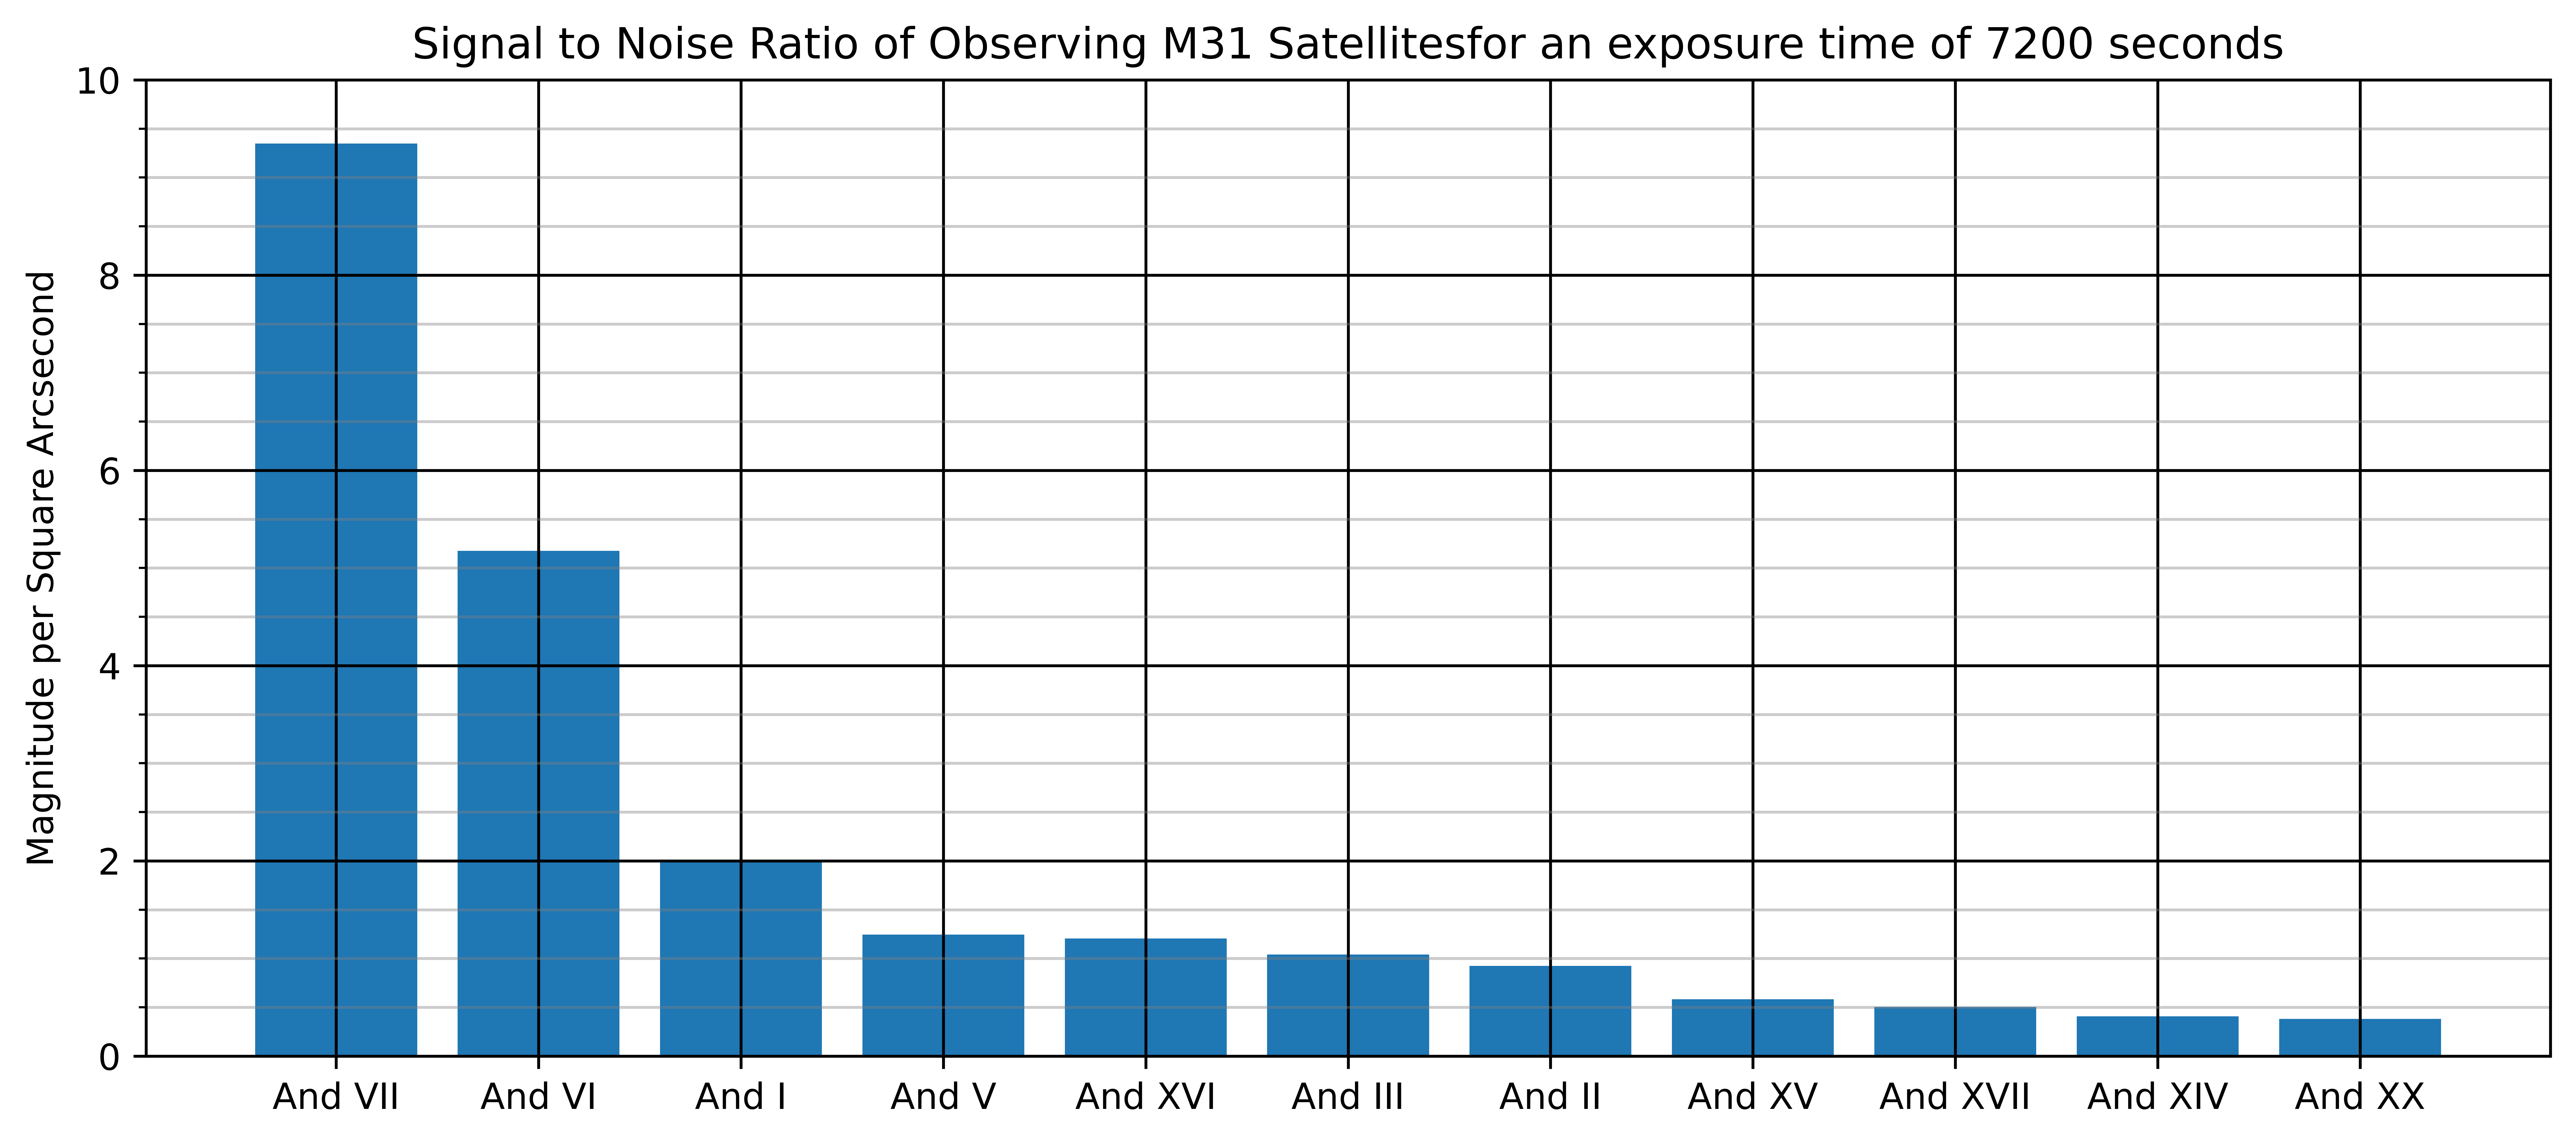

In [132]:
values = np.array(list((snr_dict.values())))
fig, ax = plt.subplots(figsize=(12, 5))
indices = np.arange(len(labels))
fig.dpi = 1000
bottom = int(np.amin(values))
plt.bar(x = indices, height = values - bottom, 
        bottom = bottom )
plt.xticks(indices, labels)
plt.grid(which='major', color='black')
plt.grid(which='minor', color='grey', alpha=0.4)
plt.minorticks_on()
plt.ylabel("Magnitude per Square Arcsecond")
plt.tick_params(axis='x', which='minor', bottom = False)
plt.grid(axis='x', which = 'minor', alpha = 0)
plt.ylim(int(np.amin(values)), int(np.amax(values) + 1)) 
plt.yticks()
title = ("Signal to Noise Ratio of Observing M31 Satellites" + 
        "for an exposure time of " + str(max_t) + " seconds")
plt.title(title)